In [9]:

from math import exp,sqrt
import numpy as np
import pdb
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
class simulator:
    def __init__(self) -> None:
        pass 

    def run_simulations(self, n : int ):
        '''
        Determine how many brownian motion simulations you would like to generate
        
        Returns
        --------
        'dict' 
            A dictionary in which the key, value pairs are the index of each simulation and a list of the generated outcomes
        
        '''
        results = {}

        for i in range(1, n + 1,1):
            results[i] = self.calculate()
        return results

    def plot_simulations(self, results):
        '''
        Plot all simulations once they are ready
        '''
        results = pd.DataFrame(results)
        plt.figure(figsize=(15, 10))
        plt.plot(results)
        self.add_graph_information()
        plt.show()
        return
    
    def first_passage_barrier(self, simulations, barrier):
        count = 0
        for i in simulations.keys():
            if max(simulations[i]) > barrier:
                count += 1
        return count/self.simulations
    
    def __call__(self):
        '''
        Call method to generate and plot all simulations after all variables are created
        '''
        simulations = self.run_simulations(self.simulations)
        self.plot_simulations(simulations)
        return




class geometric_brownian_motion_simulation(simulator):
    '''
    This class once instantiated will generate and plot price paths that were simulated with geometric brownian motion.
        Parameters
    ----------
    initial price : `float`
        The initial price of a stock at time 0.
    drift_term : `float`
        The tendency of the asset to move in a particular direction (i.e the overall trend).
    sigma : `float`
        The 'volatility' of the asset.
    '''

    def __init__(self, initial_price, drift_term, sigma, increments, time_interval, n_simulations):
        super().__init__()
        self.initial_price = initial_price
        self.drift_term = drift_term 
        self.sigma = sigma 
        self.increments = increments 
        self.time_interval = time_interval
        self.simulations = n_simulations

    def calculate(self):
        '''
        Generate the path of the stock using gbm
        '''
        increments_per_period = int(self.increments/ self.time_interval)
        dt = 1/increments_per_period #for each period, there will be dt time steps
        price_vector = np.zeros(self.increments+1)
        price_vector[0] = self.initial_price
         
        path = np.exp((self.drift_term - 0.5 * self.sigma**2 ) * dt + self.sigma * np.random.normal(0, np.sqrt(dt), size = self.increments ))
        price_vector[1:] = path
        price = price_vector.cumprod()
        return price 

    def add_graph_information(self):
        plt.xlabel("Increments")
        plt.ylabel("Stock Value")
        plt.title(f"Realizations of {self.simulations} Geometric Brownian Motion simulations using $\mu = {self.drift_term}$ and $\sigma = {self.sigma}$")



In [42]:
class standard_brownian_motion_simulation(simulator):
    '''
    This class once instantiated will generate and plot price paths that were simulated with standard brownian motion.
        Parameters
    ----------
    increments : `int`
        The number of increments that will be used for the whole time period.
    time_interval : `int`
        The number of time periods to be used.
    n_simulations : `int`
        The number of simulations to generate and plot.
    '''
    def __init__(self, increments, time_interval, n_simulations):
        self.increments = increments 
        self.time_interval = time_interval
        self.simulations = n_simulations

    def calculate(self):
        increments_per_period = int(self.increments/ self.time_interval)
        dt = 1/increments_per_period  #for each period, there will be dt time steps

        # By definition, standard brownian motion starts at point 0
        y = 0

        #create a list to store the paths
        y_path = []
        for i in range(self.increments):
            # Generate a random step in the x and y direction and update position
            dy = np.random.normal(0, np.sqrt(dt))
            y += dy

            # Store the position in the path lists
            y_path.append(y)
        return y_path

    def add_graph_information(self):
        plt.xlabel("Increments")
        plt.ylabel("Value")
        plt.title(f"Realizations of {self.simulations} Standard Brownian Motion simulations")
    

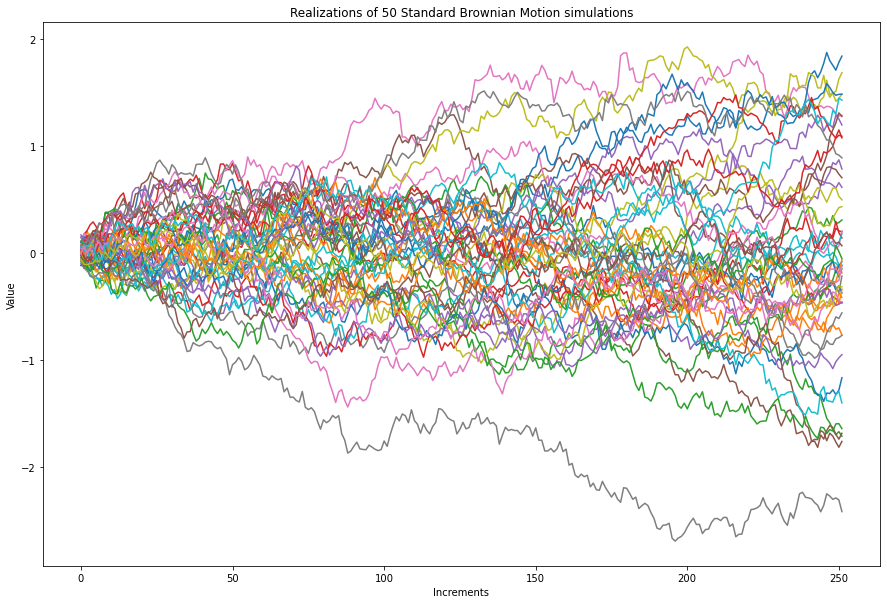

In [43]:
bm = standard_brownian_motion_simulation(252, 1, 50)
bm()

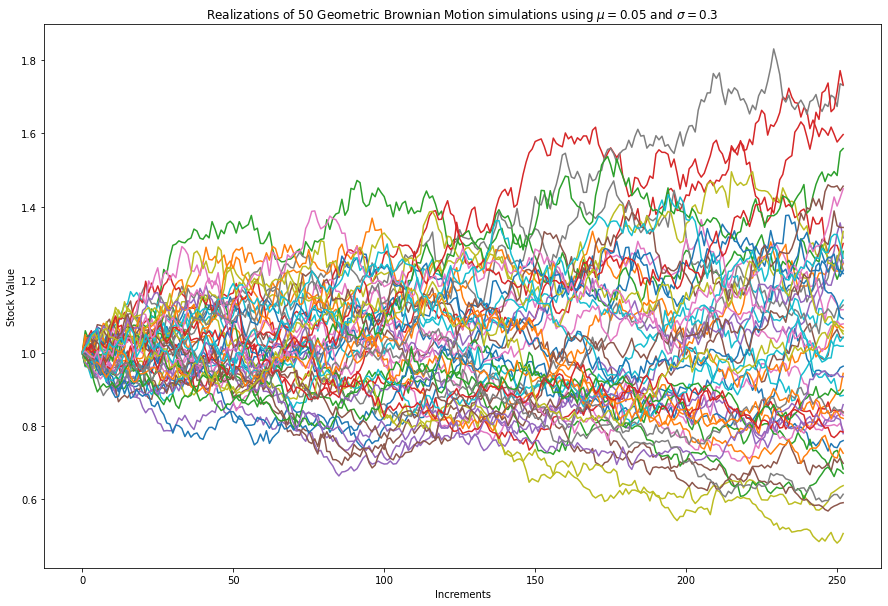

In [34]:
gbm = geometric_brownian_motion_simulation(1, 0.05, 0.30, 252, 1, 50)
gbm()


In [64]:
results = {}
simulations = [50,500, 1000, 2000, 3000]

for i in simulations:  
    gbm = standard_brownian_motion_simulation(252,1,i)
    simulations = gbm.run_simulations(gbm.simulations)
    perc_above_barrier = gbm.first_passage_barrier(simulations, 0.4)
    k = perc_above_barrier
    results['N = '+str(i)] = [round(k,3), round((abs(0.6891 - k)/0.6891),3)]


print(results)


{'N = 50': [0.66, 0.042], 'N = 500': [0.638, 0.074], 'N = 1000': [0.672, 0.025], 'N = 2000': [0.661, 0.041], 'N = 3000': [0.668, 0.031]}


In [65]:
pd.DataFrame(results)

,N = 50,N = 500,N = 1000,N = 2000,N = 3000
0,0.660,0.638,0.672,0.661,0.668
1,0.042,0.074,0.025,0.041,0.031
